In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
distances = pd.read_csv('result_csv.csv', index_col=0)
distances

,Dwayne Johnson,Chris Hemsworth,Robert Downey Jr.,Akshay Kumar,Jackie Chan,Bradley Cooper,Adam Sandler,Scarlett Johansson,Sofia Vergara,Chris Evans
Dwayne Johnson,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf
Chris Hemsworth,3.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf
Robert Downey Jr.,3.0,3.0,0.0,inf,inf,inf,inf,inf,inf,inf
Akshay Kumar,inf,inf,inf,0.0,inf,inf,inf,inf,inf,inf
Jackie Chan,inf,inf,inf,inf,0.0,inf,inf,inf,inf,inf
Bradley Cooper,inf,3.0,inf,inf,inf,0.0,inf,inf,inf,inf
Adam Sandler,inf,3.0,3.0,inf,2.0,inf,0.0,inf,inf,inf
Scarlett Johansson,2.0,3.0,3.0,inf,3.0,inf,3.0,0.0,inf,inf
Sofia Vergara,inf,inf,3.0,inf,inf,inf,3.0,3.0,0.0,inf
Chris Evans,3.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,0.0


In [3]:
graphs = {
    'full': nx.Graph(),
    1: nx.Graph(),
    2: nx.Graph(),
    3: nx.Graph(),
}

In [4]:
colors = {
    1: 'green',
    2: 'yellow',
    3: 'red',
}

In [5]:
for row_name, row  in distances.iterrows():
    graphs['full'].add_node(row_name)
    
    for column_name, value in row.items():
        graphs['full'].add_node(column_name)
        
        if value != float('inf') and value != 0:
            int_value = int(value)
            graphs['full'].add_edge(row_name, column_name, weight=int_value)
            graphs[int_value].add_nodes_from([row_name, column_name])
            graphs[int_value].add_edge(row_name, column_name, weight=int_value)
            

In [6]:
edge_colors = [colors[int(edge[1])] for edge in nx.get_edge_attributes(graphs['full'], 'weight').items()]

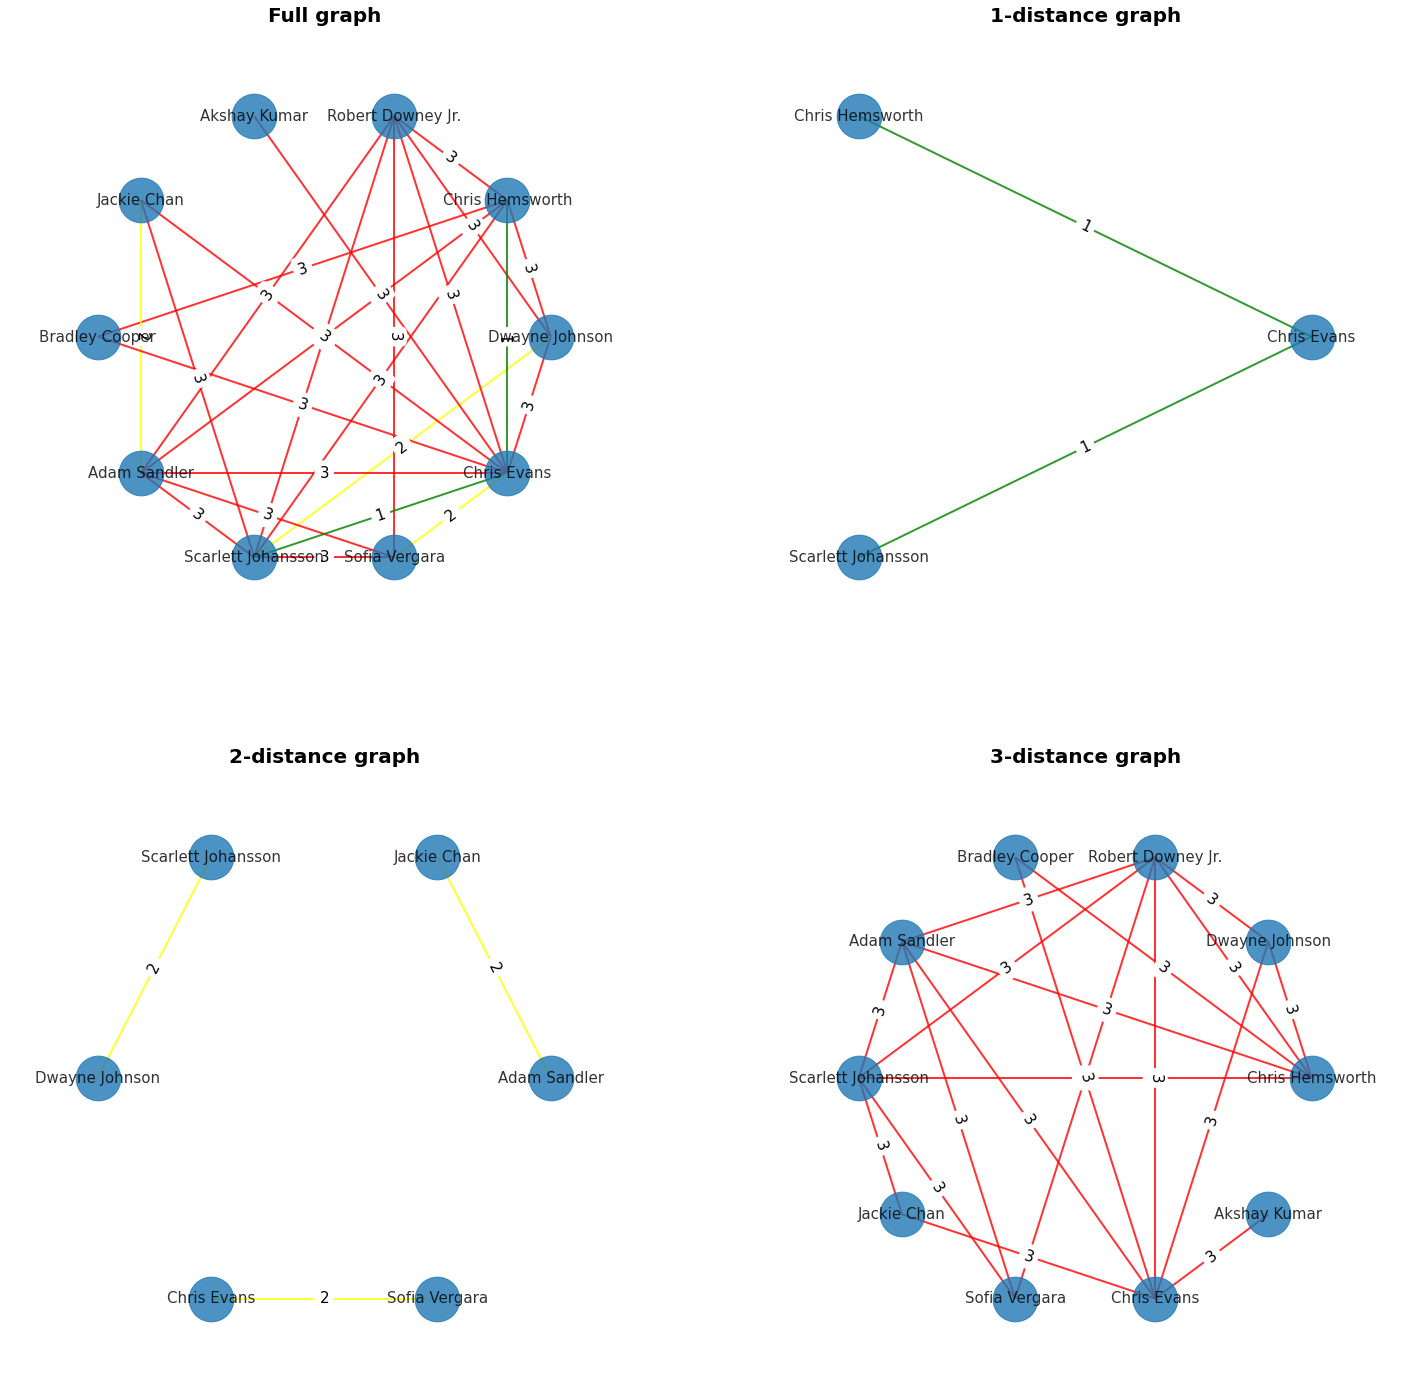

In [7]:
f, axs = plt.subplots(2, 2, figsize=(25, 25))
titles = [
    'Full graph',
    '1-distance graph',
    '2-distance graph',
    '3-distance graph',
]

for key, graph in graphs.items():
    index = 0 if key == 'full' else key
    current_axs = axs[int(index >= 2)][index%2]
    
    current_axs.margins(0.2) 
    current_axs.set_title(titles[index], fontweight="bold", size=20)
    
    edge_color = edge_colors if key == 'full' else colors[key]
    pos = nx.circular_layout(graph)
    
    nx.draw_circular(
        graph,
        ax=current_axs,
        edge_color=edge_color,
        node_size=2000,
        labels={node:node for node in graph.nodes()},
        width=2,
        font_size=15,
        alpha=0.8
    )

    nx.draw_networkx_edge_labels(
        graph,
        pos,
        nx.get_edge_attributes(graph, 'weight'),
        font_size=15,
        ax=current_axs,
    )

plt.axis('off')
plt.show()